<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/LAB4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descenso por gradiente

Procesamiento Adaptativo de Señales Aleatorias

© 2019 Mestanza, Joaquín

© 2019 Fernandez, Lucero Guadalupe

In [0]:
from IPython.display import clear_output
from scipy.io.wavfile import read
import numpy as np
import scipy
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave, struct, math, random
from IPython.display import Audio
from scipy import signal as sgn
from scipy.linalg import toeplitz
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import ccf

In [0]:
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/LAB4/data/Tamara_Laurel_-_Sweet_extract.wav"
clear_output()

In [0]:

def get_mono_array(stereo_file_name):
  file = read(stereo_file_name)
  fs = file[0]
  datos = np.array(file[1],dtype=float) 
  if len(np.shape(datos))>1: #si tiene dos canales
      ch0 = datos[:, 0]
      ch1 = datos[:, 1]
      datos = (ch0 + ch1)/2  # o lo hacemos mono
  return fs, datos
  
def get_signal(path):
  file_name = path
  fs, signal = get_mono_array(file_name)
  signal =  signal/np.linalg.norm(signal)   #normalizo
  return signal


In [0]:
#codigo de ejemplo otorgado por la cátedra
def cost_function(w1, w2, sigma2u):
  w = [w1, w2]
  
  J = sigma2u
  J -= np.dot(np.transpose(w), p)
  J -= np.dot(np.transpose(p), w)
  J += np.dot(np.transpose(w), np.dot(R, w))
  
  return J

In [0]:
"""Implementa el filtrado óptimo Wiener con descenso por gradiente.

Argumentos:
  R: matriz de autocorrelación
  p: matriz de correlación cruzada
  w0: valor inicial de los coeficientes del filtro
  mu: tamaño de paso
  N: número máximo de iteraciones

Devuelve:
  Una matriz de tipo np.array en cuyas filas están
  los coeficientes w para cada paso.
"""
def steepest_descent(R, p, w0, mu, N, sigma2u):
  J = np.zeros(N)

  Wt[0, :] = w0
  J[0] = cost_function(Wt[0, 0], Wt[0, 1], sigma2u)
  
  for n in range(1, N):
    Wt[n, :] = Wt[n - 1, :] + mu * (p - np.dot(R, Wt[n - 1, :]))
    J[n] = cost_function(Wt[n, 0], Wt[n, 1], sigma2u)
  
  Jmin = sigma2u - np.dot(np.transpose(p), np.dot(R, p))
    
  # return Wt
  return J, Jmin, Wt

In [0]:
def calc_optimum_filter(R, p, sigma2d):
  '''
  Calcula el filtro Wiener óptimo
  
  sigma2: energía de la señal de entrada
  R: matriz de autocorrelación
  p: vector de correlación cruzada
  '''
  
  wo = np.dot(np.linalg.inv(R), p)
  Jmin = sigma2d - p.dot(wo)
  return wo, Jmin

Probamos la función con los argumentos sugeridos y ploteamos los coeficientes en el tiempo.

In [0]:
R = np.array([[2, 1], [1,2]])
p = np.array([6, 4])
mu = 0.1
N = 1000
w0 = [0, 0]
sigma2u = 20

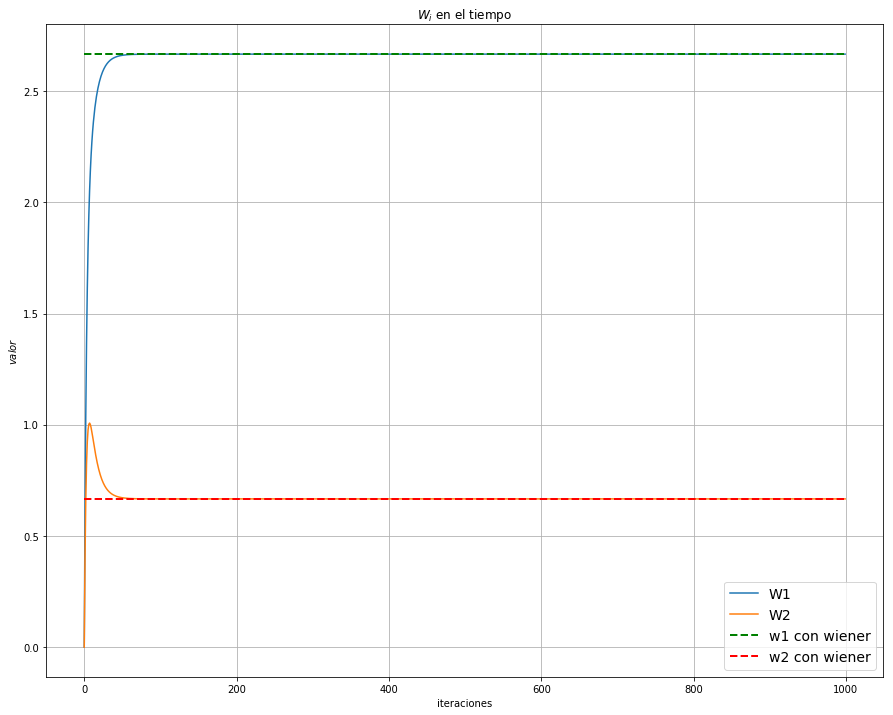

In [158]:
#filtro óptimo Wiener
w0_wiener, Jmin_wiener = calc_optimum_filter(R, p, sigma2u)


#steepest descent
Wt = np.ones((N, len(w0)))
J, Jmin, Wt = steepest_descent(R, p, w0, mu, N, sigma2u)


#ploteamos ambas para compararlas
plt.figure(figsize=(15, 12))
plt.plot(Wt[:,0])
plt.plot(Wt[:,1])
plt.plot([0, len(Wt) - 1], [w0_wiener[0], w0_wiener[0]], color='g', linestyle='--', linewidth=2)
plt.plot([0, len(Wt) - 1], [w0_wiener[1], w0_wiener[1]], color='r', linestyle='--', linewidth=2)

plt.legend(['W1', 'W2', 'w1 con wiener', 'w2 con wiener'], fontsize=14)
plt.title('$W_i$ en el tiempo')
plt.xlabel('iteraciones')
plt.ylabel('$valor$')
plt.grid()
plt.show()

Ploteamos la curva de error $J(n)$

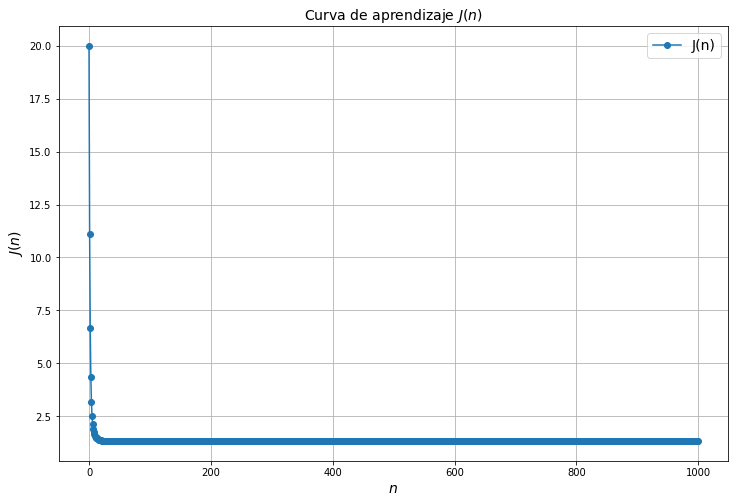

In [160]:
    plt.figure(figsize=(12, 8))
    plt.plot(J, marker='o', label='J(n)')
    plt.xlabel('$n$')
    plt.ylabel('$J(n)$')
    plt.title('Curva de aprendizaje $J(n)$')
    plt.grid()
    plt.show()